In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, ydata_profiling, shap

Matplotlib is building the font cache; this may take a moment.


In [2]:
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('./data/cardata.csv', index_col=0)

EDA

In [5]:
summary = df.describe()

In [6]:
summary.drop(['nrOfPictures','postalCode'],axis=1,inplace=True)

In [7]:
summary

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


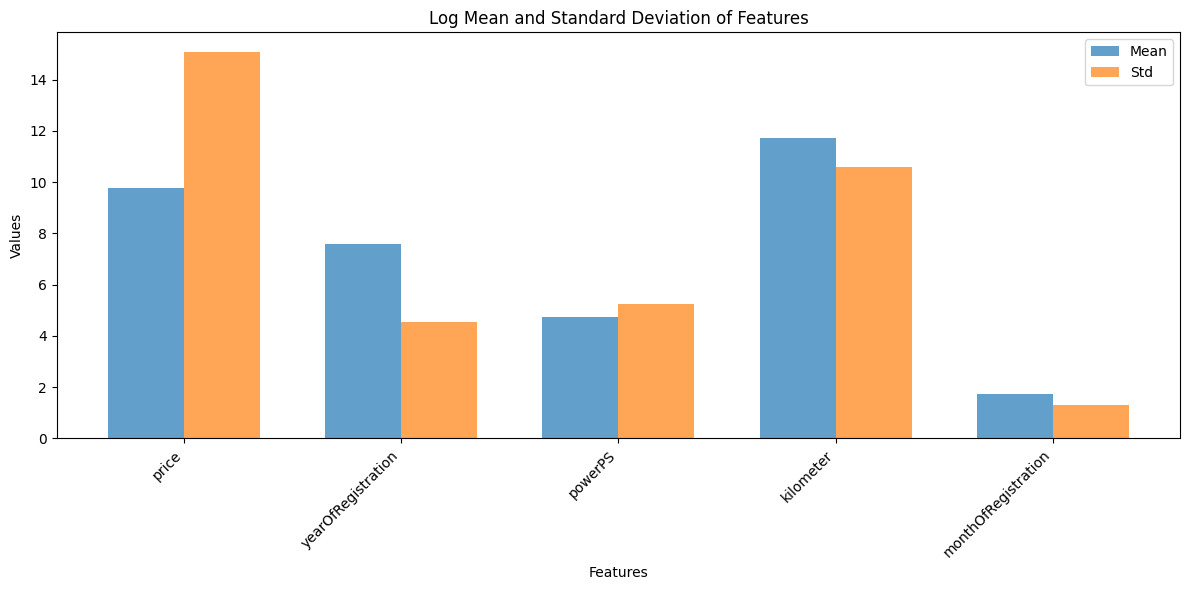

In [8]:
x_labels = list(summary.columns)
y1 = np.log(list(summary.loc['mean']))
y2 = np.log(list(list(summary.loc['std'])))

width = 0.35
x = np.arange(len(x_labels))

plt.figure(figsize=(12,6))

plt.bar(x - width/2, y1, width=width, label='Mean', alpha=0.7)
plt.bar(x + width/2, y2, width=width, label='Std', alpha=0.7)

plt.xticks(x, x_labels, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Log Mean and Standard Deviation of Features')
plt.legend()

plt.tight_layout()
plt.show()

**Note:**  
- `powerPS`, `yearOfRegistration`, and `monthOfRegistration` exhibit very little variation (low standard deviation). Further investigation will be conducted.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-null  o

In [10]:
# Missing Values
dataInfo =[]
for col in df.columns:
  num_nam = df[col].isna().sum()
  dataInfo.append([col,num_nam,num_nam/len(df)*100,df[col].nunique()])

In [11]:
mising_value_df = pd.DataFrame(dataInfo,columns=['Feature','NumNan','PercentNan','NumUnique'])

In [12]:
mising_value_df

,Feature,NumNan,PercentNan,NumUnique
0,dateCrawled,0,0.000000,280500
1,name,0,0.000000,233531
2,seller,0,0.000000,2
3,offerType,0,0.000000,2
4,price,0,0.000000,5597
5,abtest,0,0.000000,2
6,vehicleType,37869,10.192771,8
7,yearOfRegistration,0,0.000000,155
8,gearbox,20209,5.439429,2
9,powerPS,0,0.000000,794
